In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\Arun karthik\Documents\MANASA\AirPassengers.csv")

In [2]:
data['Month'][0] #to check if it is a string

'1949-01'

### CONVERTING STRING TO DATE TIME FORMAT

In [3]:
data['Month']=pd.to_datetime(data['Month'])

In [4]:
data['Month'][0]

Timestamp('1949-01-01 00:00:00')

### SETTING INDEX AS MONTH

In [5]:
data=data.set_index(['Month']) 

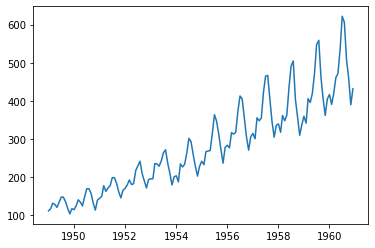

In [6]:
plt.plot(data)

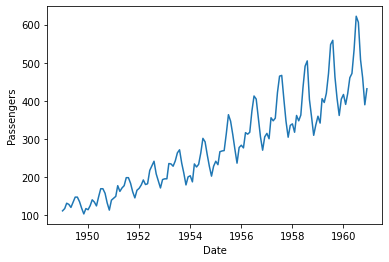

In [7]:
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.plot(data)

## TO CHECK THE STATIONARITY OF THE DATA

### USING ROLLING STATISTICS 
Plot moving avaerage or moving variance and check if it varies with time

In [8]:
rmean = data.rolling(window=12).mean()
rstd = data.rolling(window=12).std()

Text(0.5, 1.0, 'ROLLING MEAN AND STANDARD DEVIATION')

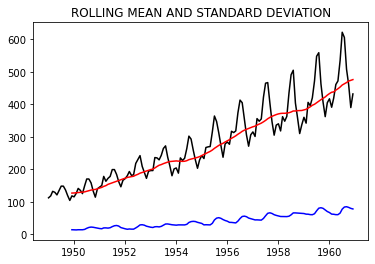

In [9]:
plt.plot(data,c='black')
plt.plot(rmean,c='red')
plt.plot(rstd,c='blue')
plt.title("ROLLING MEAN AND STANDARD DEVIATION")

### ADF TEST : AUGMENTED DICKEY - FULLER TEST
The test will give results in hypothesis tests with null and alternative hypotheses - Inference needs to be made from the p - value

The p - value should be less than 0.05 ( <0.05 ) for a stationary data
###### 0.05 = 100 - (Confidence Interval)

In [10]:
from statsmodels.tsa.stattools import adfuller

adftest = adfuller(data['#Passengers'])

print(adftest)

(0.8153688792060411, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


#### P VALUE :
2nd value in the adftest tuple is the p value
###### => p value = 0.9918802434376409

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
decompose = seasonal_decompose(data)

In [13]:
trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid
obs = decompose.observed

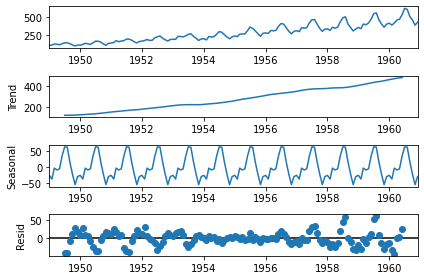

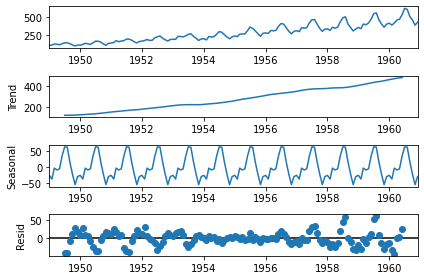

In [14]:
decompose.plot()

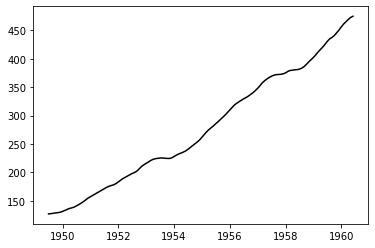

In [15]:
#plt.subplot(311)
plt.plot(trend,c = 'black' )

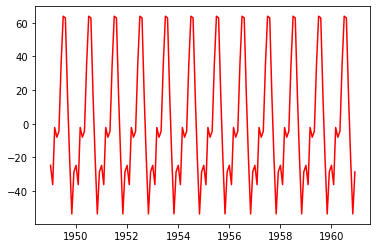

In [16]:
#plt.subplot(311)
plt.plot(seasonal,c = 'red')

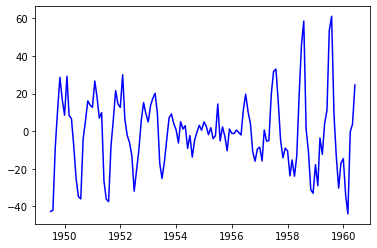

In [17]:
#plt.subplot(311)
plt.plot(residual,c = 'blue')

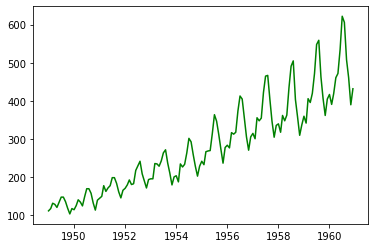

In [18]:
#plt.subplot(311)
plt.plot(obs,c = 'green')

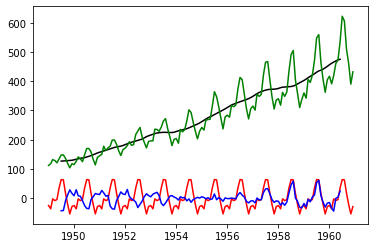

In [19]:
plt.plot(trend,c = 'black' )
plt.plot(seasonal,c = 'red')
plt.plot(residual,c = 'blue')
plt.plot(obs,c = 'green')

#### CONVERTING NON STATIONARY TO STATIONARY DATA
Reducing the P - VALUE 

In [20]:
data['#Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [21]:
data['#Passengers'].shift(2)

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01    112.0
1949-04-01    118.0
1949-05-01    132.0
              ...  
1960-08-01    535.0
1960-09-01    622.0
1960-10-01    606.0
1960-11-01    508.0
1960-12-01    461.0
Name: #Passengers, Length: 144, dtype: float64

###### DataFrame.shift(n)
n => periods (integer)

The value in the first n rows are shifted to the next rows; That is the values of that row become null values or missing values

###### EXAMPLE: 
Here the n value is 2 : 

1949-01-01    112

1949-02-01    118

1949-03-01    132

1949-04-01    129

###### changed as...........
1949-01-01      NaN

1949-02-01      NaN

1949-03-01    112.0

1949-04-01    118.0

###### 112 and 118 are moved to 3rd and 4th rows and the values of first 2 rows has become NaN

In [22]:
data1 = data['#Passengers'] - data['#Passengers'].shift(2)
data1

Month
1949-01-01      NaN
1949-02-01      NaN
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #Passengers, Length: 144, dtype: float64

In [23]:
df = data1.dropna()
df

Month
1949-03-01     20.0
1949-04-01     11.0
1949-05-01    -11.0
1949-06-01      6.0
1949-07-01     27.0
              ...  
1960-08-01     71.0
1960-09-01   -114.0
1960-10-01   -145.0
1960-11-01   -118.0
1960-12-01    -29.0
Name: #Passengers, Length: 142, dtype: float64

###### Here we drop the null values therefore the first 2 rows are deleted

In [24]:
adfuller(df)

(-2.961695135555424,
 0.03862975767698843,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 985.7309222414162)

Text(0.5, 1.0, 'ROLLING MEAN AND STANDARD DEVIATION AFTER CHANGING THE P - VALUE')

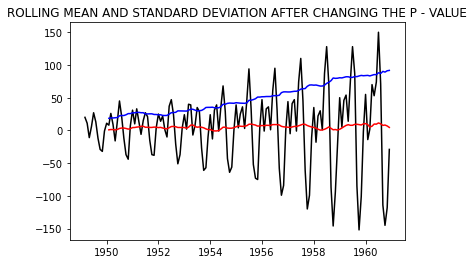

In [25]:
rmean1 = df.rolling(window=12).mean()
rstd1 = df.rolling(window=12).std()
plt.plot(df,c='black')
plt.plot(rmean1,c='red')
plt.plot(rstd1,c='blue')
plt.title("ROLLING MEAN AND STANDARD DEVIATION AFTER CHANGING THE P - VALUE")

Text(0.5, 1.0, 'ROLLING MEAN AND STANDARD DEVIATION AFTER CHANGING THE P - VALUE')

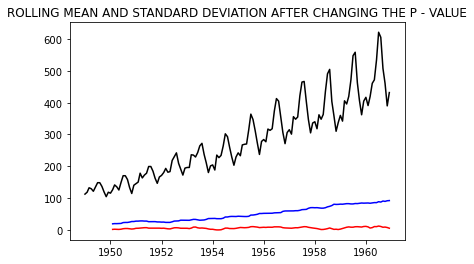

In [26]:
rmean1 = df.rolling(window=12).mean()
rstd1 = df.rolling(window=12).std()
plt.plot(data,c='black')
plt.plot(rmean1,c='red')
plt.plot(rstd1,c='blue')
plt.title("ROLLING MEAN AND STANDARD DEVIATION AFTER CHANGING THE P - VALUE")

##### TRIAL AND ERROR SHIFT DONE TO GET P - VALUE < 0.05
###### => P - VALUE = 0.03862975767698843 ( from 0.9918802434376409 )

## PLOTTING ACF & PACF
Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
The ACF and PACF are used to figure out the order of AR, MA, and ARMA models

In [27]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

###### Find the value whare y axis for ACF reaches 0 first - That value is P
###### Find the value whare y axis for PACF reaches 0 first - That value is Q

In [28]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,8

In [29]:
d_acf = acf(df)
d_pacf = pacf(df)

C:\python_anaconda\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\python_anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\python_anaconda\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\python_anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


In [30]:
d_acf

array([ 1.        ,  0.5822477 , -0.04337616, -0.32649986, -0.34916999,
       -0.22472315, -0.14602314, -0.22133413, -0.34085469, -0.3076065 ,
       -0.04541068,  0.4987363 ,  0.85264827,  0.49830279, -0.04744865,
       -0.28572334, -0.27897604, -0.17052404, -0.12160365, -0.21622026,
       -0.3269304 , -0.27603482, -0.03215536,  0.43467687,  0.73320668,
        0.43248439, -0.04290421, -0.24142857, -0.22748344, -0.14270232,
       -0.10064918, -0.17886354, -0.27993761, -0.23606892, -0.02286963,
        0.35782924,  0.60935298,  0.36471169, -0.03202462, -0.17730936,
       -0.15901597])

In [31]:
d_pacf

array([ 1.00000000e+00,  5.86377120e-01, -5.91064435e-01,  1.26688033e-01,
       -3.06181423e-01,  8.61697511e-02, -3.83786363e-01, -2.37968433e-01,
       -5.13661962e-01, -3.57845252e-01, -5.43448019e-01,  8.67139603e-01,
       -8.75260297e-01,  4.14738159e+00,  1.36762873e+00, -5.32685106e-01,
        4.71914420e-01, -3.70865069e-01,  9.58841171e-02, -4.49190596e-01,
        4.36039730e-01, -5.80684225e-01,  1.20473599e+00,  6.51665632e+00,
       -8.96404570e-01,  4.75263885e-01, -3.27404861e-01,  2.89169356e-01,
       -6.60449599e-01,  4.24110464e-01, -4.23602954e-01,  1.83628428e+00,
        2.00548958e+00, -9.09260284e-01,  1.01586221e-01,  2.41747979e-01,
        1.72903023e+00, -1.70623758e-03,  1.62837049e+00, -1.43925782e+00,
       -1.40536943e+00])

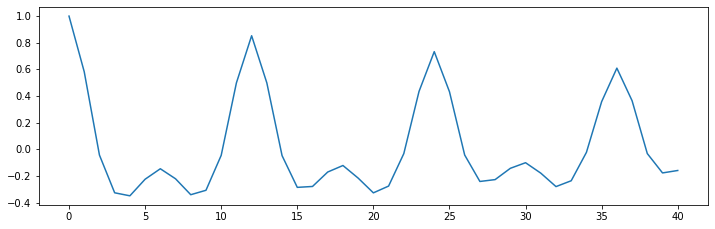

In [32]:
plt.subplot(212)
plt.plot(d_acf)

##### The curve touches y axis at x = 2
##### => p = 2

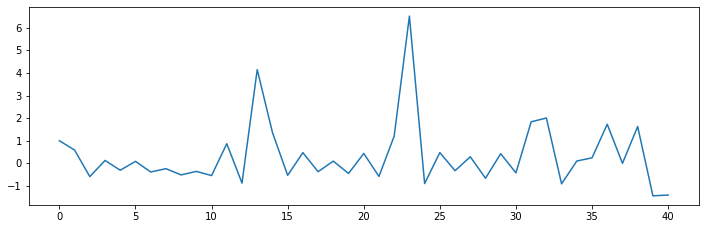

In [33]:
plt.subplot(212)
plt.plot(d_pacf)

##### The curve touches y axis at x = 2
##### => q = 2

## AR MODEL
###### AUTO REGRESSIVE MODEL
#### ORDER OF AR MODEL : ( p , d , 0 )
###### ( 2 , 2 , 0 )

In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
ar_model = ARIMA(data , order = ( 2 , 2 , 0 ))
ar_result = ar_model.fit()

C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


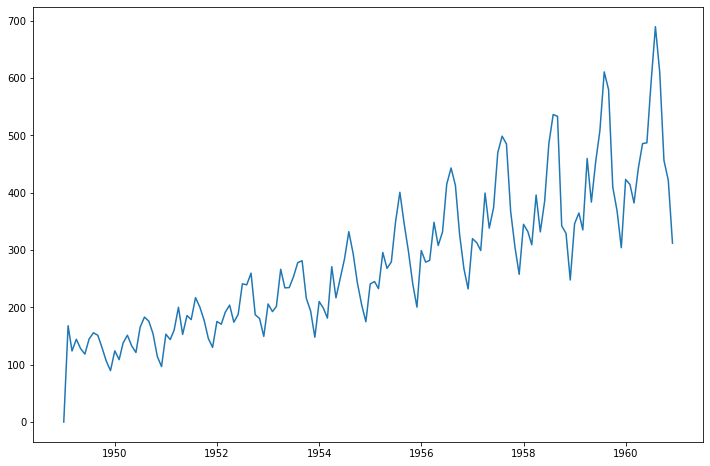

In [36]:
plt.plot(ar_result.fittedvalues)

## MA MODEL
###### MOVING AVERAGE MODEL
#### ORDER OF MA MODEL : ( 0 , d , q )
###### ( 0 , 2 , 2 )

In [37]:
ma_model = ARIMA(data , order = ( 2 , 2 , 0 ))
ma_result = ma_model.fit()

C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


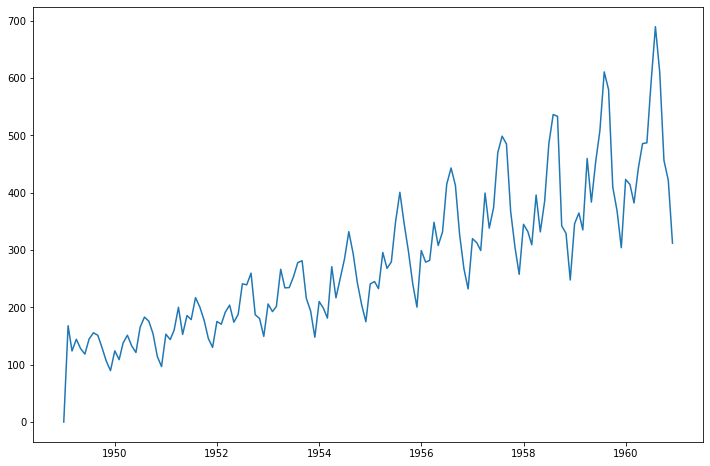

In [38]:
plt.plot(ma_result.fittedvalues)

## ARIMA MODEL
AR + I + MA = ARIMA
#### ARIMA :
p => AUTO REGRESSION LAG

d => SHIFT

q => MOVING AVERAGE LAG
#### ORDER OF ARIMA :
=> ( p , d , q )

###### Here the order is :
###### p = 2
###### q = 2
###### d = 2 ( Cuz here the shift we did was for 2 rows)

In [39]:
model = ARIMA(data , order = (2,2,2))
model_fit = model.fit()

C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


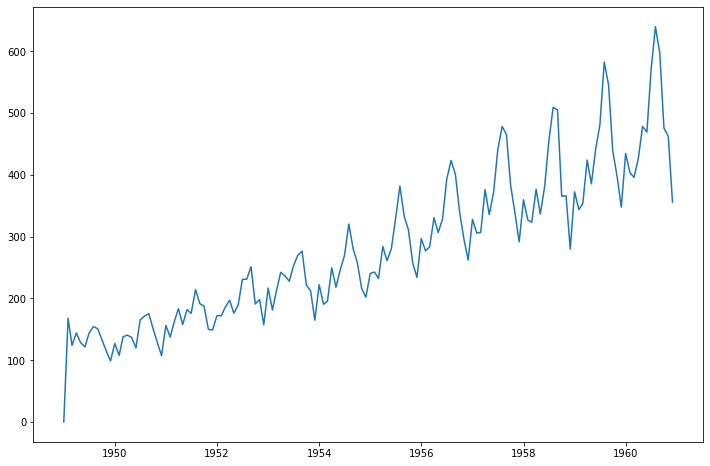

In [40]:
plt.plot(model_fit.fittedvalues)

#### FORECASTING
HERE DONE FOR 24 MONTHS AND THEN FOR 1000 MONTHS

In [41]:
res = model_fit.forecast(24)

In [42]:
res_mem = model_fit.forecast(1000)

In [43]:
res

1961-01-01    475.896564
1961-02-01    463.411495
1961-03-01    477.252747
1961-04-01    472.887561
1961-05-01    479.763689
1961-06-01    479.491052
1961-07-01    483.728684
1961-08-01    485.114701
1961-09-01    488.302634
1961-10-01    490.351777
1961-11-01    493.120594
1961-12-01    495.434598
1962-01-01    498.036029
1962-02-01    500.455816
1962-03-01    502.990396
1962-04-01    505.452430
1962-05-01    507.960311
1962-06-01    510.439219
1962-07-01    512.936436
1962-08-01    515.422083
1962-09-01    517.915042
1962-10-01    520.403379
1962-11-01    522.894637
1962-12-01    525.384050
Freq: MS, Name: predicted_mean, dtype: float64

In [44]:
res_mem

1961-01-01     475.896564
1961-02-01     463.411495
1961-03-01     477.252747
1961-04-01     472.887561
1961-05-01     479.763689
                 ...     
2043-12-01    2945.787935
2044-01-01    2948.278062
2044-02-01    2950.768189
2044-03-01    2953.258317
2044-04-01    2955.748444
Freq: MS, Name: predicted_mean, Length: 1000, dtype: float64

###### res contains the data for next 24 months

In [45]:
res = pd.DataFrame(res)

In [46]:
res.columns = ['#Passengers']

In [47]:
data_final = pd.DataFrame(data)

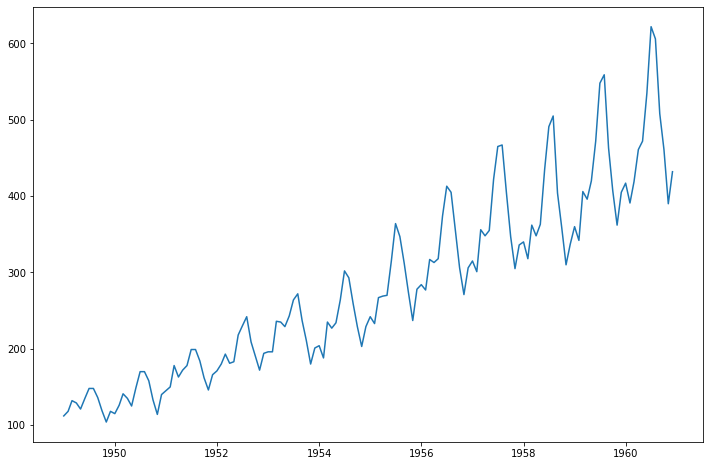

In [48]:
plt.plot(data_final)

###### Data for next 24 months is predicted and plotted according to the past data

In [49]:
d_pred = pd.DataFrame(res)

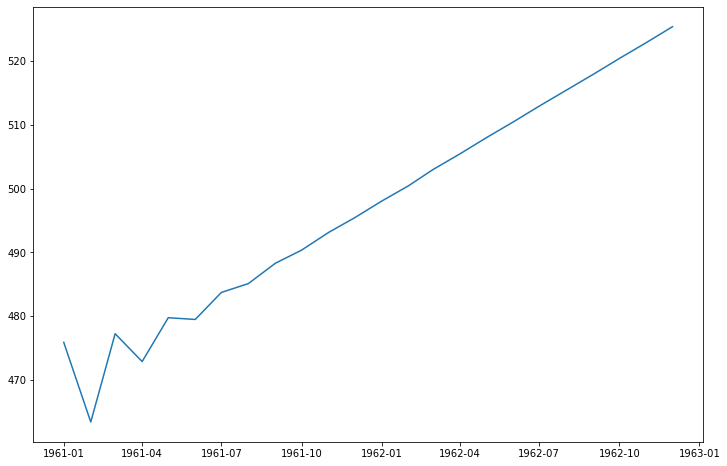

In [50]:
plt.plot(res)

###### data_pred consists of the past data as well as the future data and is plotted

In [51]:
data_pred = data_final.append(res)

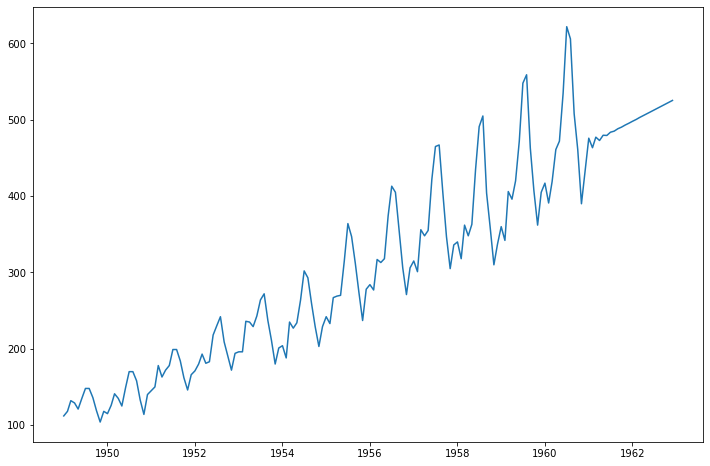

In [52]:
plt.plot(data_pred)

We get a Straight line for the next 2 years cuz Seasonality is not included in ARIMA

##### Now the model is plotted with seasonl order ( HERE FOR 12 MONTHS )

In [53]:
model1 = ARIMA(data, order=(2,2,2), seasonal_order=(2,2,2,12))
model_fit1 = model1.fit()

C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\python_anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


#### FORECASTING
HERE DONE FOR 24 MONTHS AND THEN FOR 1000 MONTHS

In [54]:
res1 = model_fit1.forecast(24)

In [55]:
res1

1961-01-01    452.838054
1961-02-01    420.606133
1961-03-01    467.538270
1961-04-01    495.285752
1961-05-01    516.017024
1961-06-01    575.487892
1961-07-01    670.546345
1961-08-01    658.344708
1961-09-01    552.920838
1961-10-01    497.877871
1961-11-01    428.153512
1961-12-01    473.255886
1962-01-01    492.147679
1962-02-01    456.642322
1962-03-01    498.995908
1962-04-01    534.359719
1962-05-01    554.842044
1962-06-01    622.195128
1962-07-01    723.002375
1962-08-01    707.862525
1962-09-01    592.999830
1962-10-01    536.914679
1962-11-01    460.269233
1962-12-01    507.245068
Freq: MS, Name: predicted_mean, dtype: float64

###### res1 contains the data for next 24 months

In [56]:
res1 = pd.DataFrame(res1)

In [57]:
res1.columns = ['#Passengers']

In [58]:
data_final1 = pd.DataFrame(data)

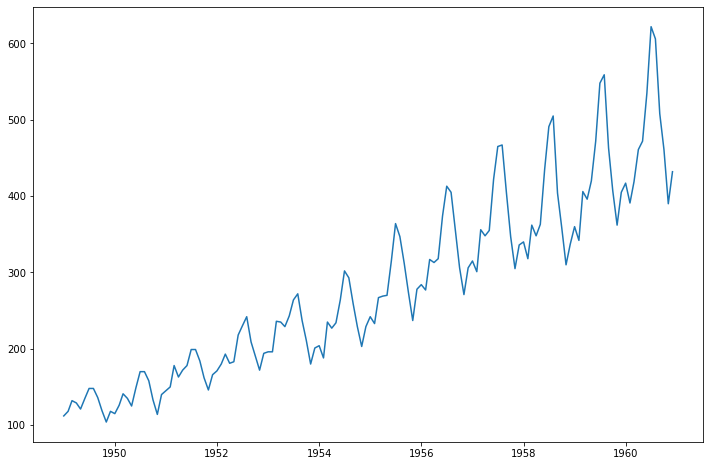

In [59]:
plt.plot(data_final1)

###### Data for next 24 months is predicted and plotted according to the past data

In [60]:
d_pred1 = pd.DataFrame(res1)

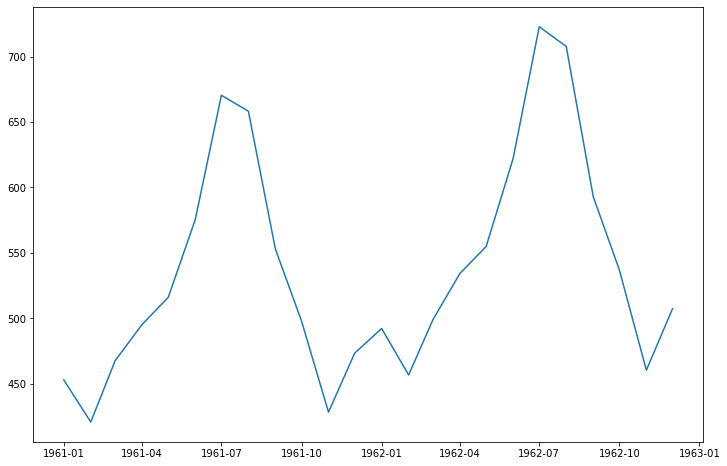

In [61]:
plt.plot(d_pred1)

###### data_pred1 consists of the past data as well as the future data and is plotted

In [62]:
data_pred1 = data_final1.append(res1)

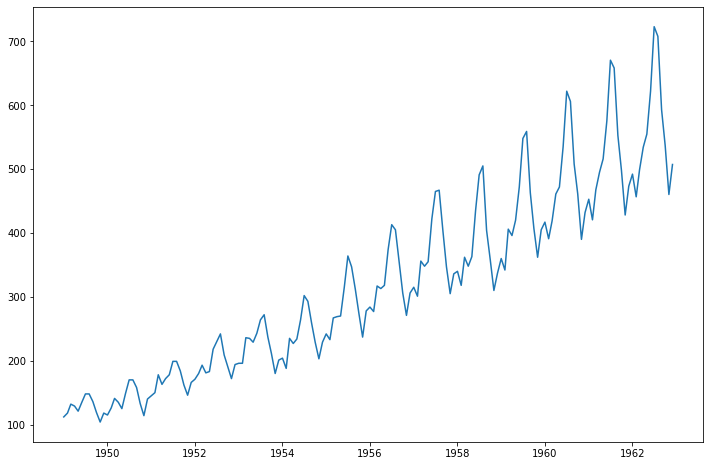

In [63]:
plt.plot(data_pred1)